In [194]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [195]:
# df = pd.read_csv(r"C:\Users\dpino\Documents\DATA SCIENCE\Jupyter\BOOTCAMP\T6.1\housing data.csv", sep=",", header=None, engine="python", encoding="latin-1")

In [196]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_data.csv')
X_train = df_train.drop("MEDV", axis=1)
y_train = df_train['MEDV']
X_test = df_test.drop('MEDV', axis=1)
y_test = df_test['MEDV']

Importamos el Train - Test del ejercicio anterior 

#### Ejercicio 5
No utilices la variable del número de habitaciones ( RM ) a la hora de realizar predicciones.

In [197]:
X_train_1 = X_train.drop('RM', axis=1)
X_test_1 = X_test.drop('RM', axis=1)

Eliiminamos la variable RM del X_train y X_test, para las predicciones.

#### Ejercicio 1
Crea al menos dos modelos de regresión diferentes para intentar predecir lo mejor posible el precio de las viviendas ( MEDV ) del archivo adjunto.

#### Ejercicio 2
Compárales en base al MSE y al R2.

#### Antes de Buscar Hiperparametros y Validacion Cruzada 

In [198]:
dtc = DecisionTreeRegressor(random_state=42)
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
lr = LinearRegression()

Elegimos 3 modelos de regresion, quiero comparar los modelos antes de buscar hipermarametros y despues, para saber si su rendimiento ha mejorado o no.

In [199]:
modelos = {
    'dtc': dtc,
    'rfr': rfr,
    'lr' : lr,
}

Para cada modelo con un ciclo for lo entrenamos, realizamos predicciones, calculamos mse y r2 y hacemos un dataframe con sus resultados para luego ser comparado.

Analisis Antes de modelo mejorado: 

MSE(Mean Squared Error):: El modelo con mas ajuste (menor valor), a los datos (promedio de errrores al cuadrado)(Las predicciones estan mas cerca de valores reales ) es: RandomForestRegressor, luego el DecisionTreeRegressor y luego LinearRegression.

R2(coheficiente de determinacion): El modelo con mejor ajuste a los datos ( R2 varía entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor, luego LinearRegression y por ultimo DecisionTreeRegressor

conclusion: RandomForestRegressor nos da la majores metricas en ambas metricas. por lo tanto es el mas acertado.

In [200]:
y_pred = {}
output1 = []
for model_name, model in modelos.items():
    model.fit(X_train_1, y_train) #Entrenamos modelo
    y_pred = model.predict(X_test_1) #Realizamos predicciones con conjunto de prueba
    mse = mean_squared_error(y_test, y_pred) #calculamos mse
    r2 = r2_score(y_test, y_pred) #calculamos r2
    output1.append({'Model': model_name, 'MSE': mse, 'R^2': r2, 'Predictions': y_pred}) #configuramos una tabla para mostrar resultados.
output_df1 = pd.DataFrame(output1) #creamos dataframe con resultados
output_df1

,Model,MSE,R^2,Predictions
0,dtc,37.978204,0.552436,"[34.9, 14.4, 20.6, 23.9, 19.9, 13.9, 15.3, 22...."
1,rfr,25.675165,0.697424,"[37.28300000000004, 16.844999999999995, 21.256..."
2,lr,42.900292,0.494430,"[33.528491374662906, 2.2842350709744537, 18.75..."


In [201]:
predicciones_rfr = output_df1.loc[output_df1['Model'] == 'rfr', 'Predictions'].values[0]
print(predicciones_rfr)

[37.283 16.845 21.256 23.477 22.178 14.266 20.838 25.301 11.594 20.923
 22.346 17.867 20.096 21.069 20.243 32.31  21.378 26.192 23.381 23.058
 29.88  27.126 10.055 16.811 16.377 18.402 19.695 21.864  9.743 18.728
 16.461 22.873 11.516 19.397  8.881 14.448 19.077 24.687 26.186 17.039
 36.384 41.484 43.002 14.673 21.432 34.897 20.785 13.311 20.859 21.995
 10.382 19.565 23.272 29.424 20.788 21.575 20.181 14.763 37.513 15.715
 14.28  13.585  7.774 17.484 14.728 21.145 24.252 24.83  23.686 18.976
 15.593 19.958 11.244 21.939 16.848 18.187 23.083 18.759 38.214 30.816
 21.058  8.318 15.741 24.055 20.271 32.525 27.27   9.41  24.046 26.683
 21.163 19.164 36.137 20.134 36.966 14.627 15.29  13.716 42.417 19.724
 23.742 34.708 23.259 31.694 19.372 32.006 20.842 19.744  9.94  22.354
 16.116 25.204  9.645 38.652 17.995 12.16  41.241 34.59  27.39  30.
 43.76  19.281 15.104 20.133 23.826 19.04  17.273 22.434 21.405 21.49
 20.855 14.459 26.035 39.25  30.133 14.172  8.617 23.812 18.454 20.932
 29.727 35

Puedo acceder a las predicciones de cada modelo

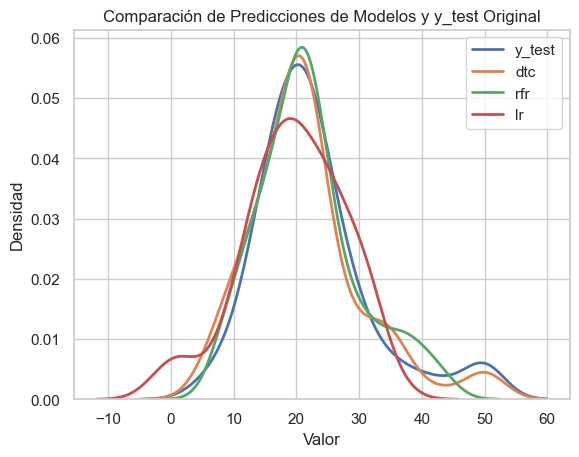

In [202]:
sns.kdeplot(y_test, label='y_test', linewidth=2)
for model_name, predictions in zip(output_df1['Model'], output_df1['Predictions']):
    sns.kdeplot(predictions, label=model_name, linewidth=2)
    plt.title('Comparación de Predicciones de Modelos y y_test Original')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.legend()
plt.show()

en esta grafica podemos comprar los tres modelos para observar su prediccion, respecto al y_test original, vemos como en la cumbre de la campana, DecisionTreeRegresso esaparentemente es el mas cercano, pero si vemos a lado y lado vemos como RandomForestRegressor, tiene mas semejanza al y_test original.

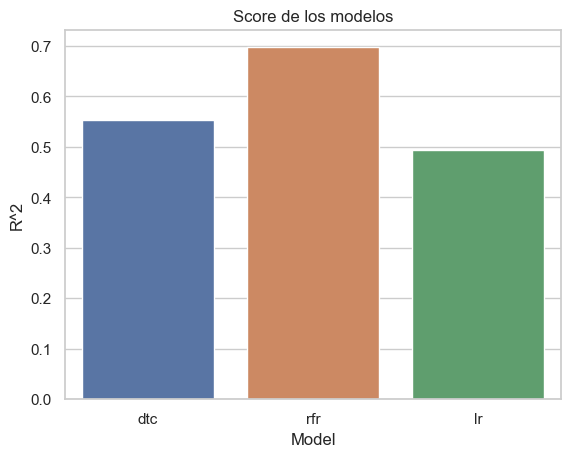

In [203]:
sns.barplot(data=output_df1, x = 'Model', y = 'R^2')
plt.title('Score de los modelos');

R2= El mas cercano al 1 significa mas ajuste de los datos, RandomForestRegressor es el mas cercano al 1.

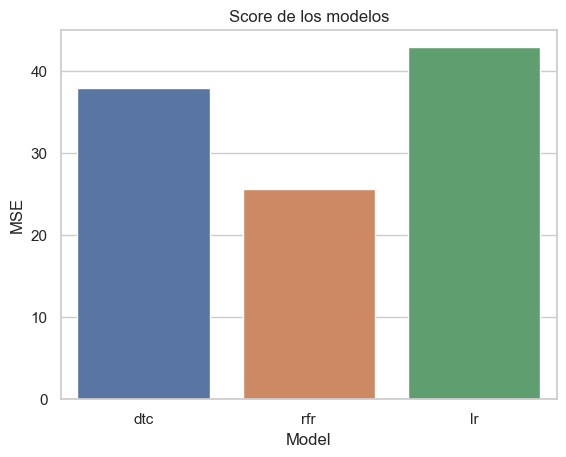

In [204]:
sns.barplot(data=output_df1, x = 'Model', y = 'MSE')
plt.title('Score de los modelos');

R2= El modelo con menor valor, significa mas ajuste de los datos, RandomForestRegressor es el de menor valor. 

#### Buscamos Hiperparametros y  Aplicamos Validacion Cruzada para tratar de mejorar los modelos

#### Ejercicio 3
Entrenalos utilizando los diferentes parámetros que admiten para intentar mejorar su predicción.

#### Ejercicio 4
Compara su rendimiento empleando la aproximación traicionando/test o empleando todos los datos (validación interna).

GridSearchCV nos permite buscar hiperparametros y a la vez hace validacion interna de los datos de manera combinada.

In [205]:
dtc = DecisionTreeRegressor(random_state=42)
parametros_decision_tree = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=dtc, param_grid=parametros_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train_1, y_train)
best_dt_model = grid_search_dt.best_estimator_
print("Mejores parámetros para DecisionTreeRegressor:", grid_search_dt.best_params_)

Mejores parámetros para DecisionTreeRegressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Parametros: DecisionTreeRegressor

max_depth: Limita la profundidad máxima de cada árbol. Reducir este valor puede hacer que los árboles sean menos profundos y, por lo tanto, más rápidos de construir. Sin embargo, también podría afectar la capacidad del modelo para capturar patrones complejos.

min_samples_split: Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Aumentar este valor puede hacer que el modelo sea más eficiente, pero podría resultar en árboles menos profundos y, por ende, en una menor capacidad para ajustarse a los datos.

min_samples_leaf: Especifica el número mínimo de muestras requeridas para estar en un nodo hoja. Al igual que min_samples_split, aumentar este valor puede mejorar la eficiencia a expensas de la profundidad del árbol.

In [206]:
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
parametros_random_forest = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(estimator=rfr, param_grid=parametros_random_forest, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_1, y_train)
best_rf_model = grid_search_rf.best_estimator_
print("Mejores parámetros para RandomForestRegressor:", grid_search_rf.best_params_)

Mejores parámetros para RandomForestRegressor: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Parametros: RandomForestRegressor los parametros datos ayudan a mejorar su rendimiento, los rangos para cada parametro pueden ser modificados en sus respectivos rangos. he modificado sus parametros, por el rendimiento de la maquina,disminuyendo sus posibles valores. 

n_estimators: Este parámetro controla el número de árboles en el bosque. Reducir este valor puede disminuir el tiempo de entrenamiento y el uso de memoria, pero también puede afectar la capacidad del modelo para generalizar bien.

max_depth: Limita la profundidad máxima de cada árbol. Reducir este valor puede hacer que los árboles sean menos profundos y más rápidos de construir, pero también podría afectar la capacidad del modelo para capturar patrones complejos.

min_samples_split: Especifica el número mínimo de muestras requeridas para dividir un nodo interno. Aumentar este valor puede hacer que el modelo sea más eficiente, pero podría resultar en árboles menos profundos y, por lo tanto, en una menor capacidad para ajustarse a los datos.

min_samples_leaf: Especifica el número mínimo de muestras requeridas para estar en un nodo hoja. Aumentar este valor puede hacer que el modelo sea más eficiente, pero nuevamente, podría resultar en un modelo con menor capacidad predictiva.

In [207]:
lr_model = LinearRegression() # No hay hiperparámetros específicos para ajustar en LinearRegression
lr_model.fit(X_train_1, y_train)
y_pred_lr = lr_model.predict(X_test_1)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

Conclusion busqueda de hiperparametros: Los hiperparametros nos permiten mejorar los modelos para que las predicciones sean mas exactas

In [208]:
best_models = {'Decision Tree': best_dt_model, 'Random Forest': best_rf_model, 'Linear Regression': lr_model}

In [215]:
output2 = []
for model_name, model in best_models.items():
    model.fit(X_train_1, y_train) #Entrenamos modelo
    y_pred = model.predict(X_test_1) #Realizamos predicciones con conjunto de prueba
    mse = mean_squared_error(y_test, y_pred) #calculamos mse
    r2 = r2_score(y_test, y_pred) #calculamos r2
    output2.append({'Modelo': model_name, 'MSE': mse, 'R2': r2, 'Predictions': y_pred}) #configuramos una tabla para mostrar resultados.
results_df = pd.DataFrame(output2) #creamos dataframe con resultados
results_df

,Modelo,MSE,R2,Predictions
0,Decision Tree,37.978204,0.552436,"[34.9, 14.4, 20.6, 23.9, 19.9, 13.9, 15.3, 22...."
1,Random Forest,25.606851,0.698229,"[37.30200000000004, 16.900833333333335, 21.409..."
2,Linear Regression,42.900292,0.494430,"[33.528491374662906, 2.2842350709744537, 18.75..."


In [217]:
output_df1 #resultado de modelo sin parametros y sin validacion cruzada.

,Model,MSE,R^2,Predictions
0,dtc,37.978204,0.552436,"[34.9, 14.4, 20.6, 23.9, 19.9, 13.9, 15.3, 22...."
1,rfr,25.675165,0.697424,"[37.28300000000004, 16.844999999999995, 21.256..."
2,lr,42.900292,0.494430,"[33.528491374662906, 2.2842350709744537, 18.75..."


Comparación despues de modelo mejorado: 

MSE: El modelo con mas ajuste a los datos (promedio de errrores al cuadrado) es: RandomForestRegressor, ademas despues del entrenamiento fue el unico modelo, que tuvo una ligera mejoria en MSE frente al modelo sin parametros y sin validacion cruzada. 

R2: El modelo con mejor ajuste a los datos ( R2 varía entre 0 y 1, y un valor más cercano a 1 indica un mejor ajuste ) es: RandomForestRegressor. ademas despues del entrenamiento fue el unico modelo, que tuvo una ligera mejoria en R2 frente al modelo sin parametros y sin validacion cruzada.

Conclusion: 
Antes y despues de mejorar los modelos el modelo RandomForestRegressor, es el mejor modelo.

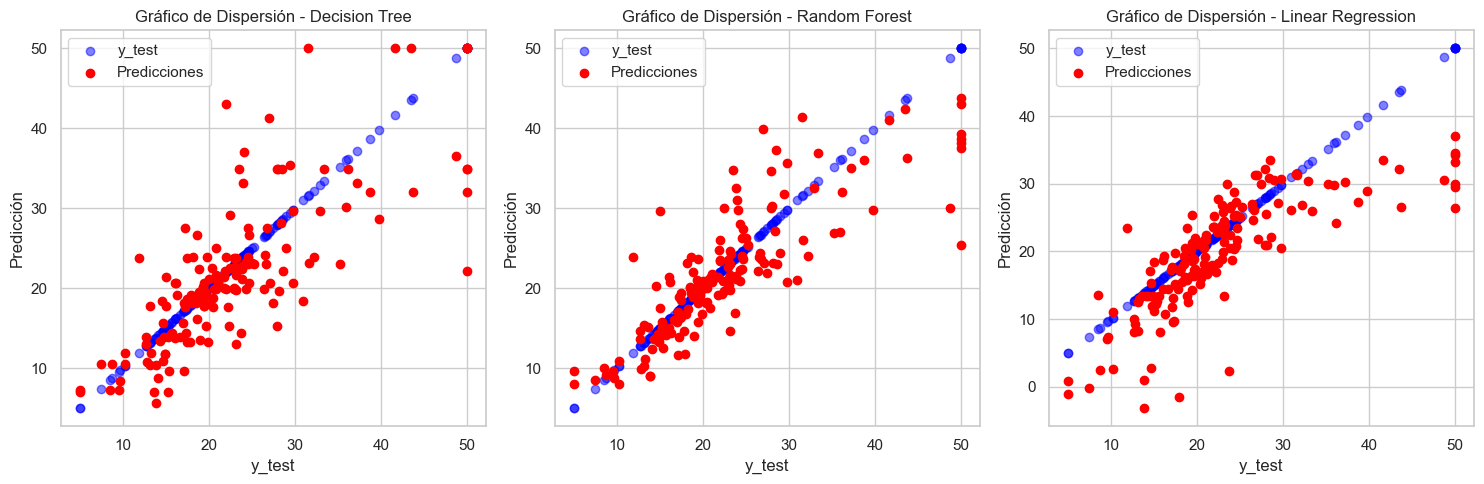

In [243]:
fig, axs = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))
for i, (model_name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test_1)
    ax = axs[i]
    ax.scatter(y_test, y_test, label='y_test', color='blue', alpha=0.5)
    ax.scatter(y_test, y_pred, label='Predicciones', color='red')
    ax.set_xlabel("y_test")
    ax.set_ylabel("Predicción")
    ax.set_title(f"Gráfico de Dispersión - {model_name}")
    ax.legend()
plt.tight_layout()
plt.show()

En estos graficos de dispersion podemos ver los modelos mejorados y el comportamiento de los datos, cada punto en el gráfico representa un par de valores (real, predicción). Idealmente, los puntos deberían alinearse cerca de la línea diagonal para decir que es el mas ajustado. respaldando las metricas mse y r2, el modelo RandomForestRegressor tiene una pequeña mejoria respecto a los demas y se logra ver graficamente. tal vez se podria mejorar los modelos con sus paremetros,  pero signficaria un consumo mayor de la maquina.  Idealmente, los puntos deberían alinearse cerca de la línea diagonal.

#### El mejor modelo RandomForestRegressor

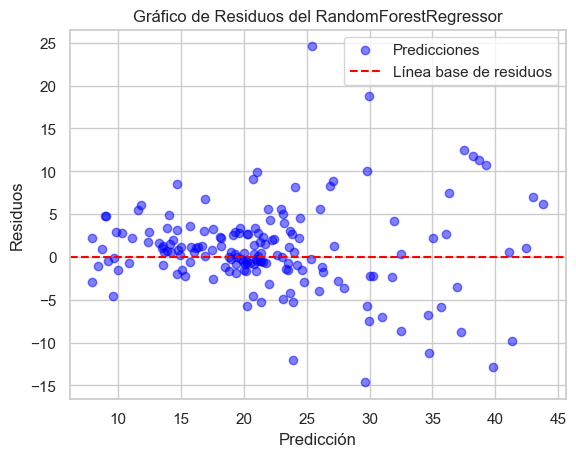

In [246]:
y_pred_rf = best_rf_model.predict(X_test_1)
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals, c='blue', label='Predicciones', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Línea base de residuos')
plt.xlabel("Predicción")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos del RandomForestRegressor")
plt.legend()
plt.show()

Este gráfico muestra la diferencia entre los valores reales y las predicciones en el eje x. Un buen modelo tendría residuos distribuidos aleatoriamente alrededor del eje x=0. aunque vemos que los residuos en algunos casos se distancian del eje x, RandomForestRegressor es el mejor modelo de los escogidos para hacer predicciones. podria mejorarse el modelo al aumentar los valores de sus hiperparametros para hacerlo mas exacto a la hora de predecir. 